# Almemo - Data Analysis

- Data Wrangling:
 - read data: combine to one file
 - handle missing/wrong data; gaps in time series?!

- Data analysis:
 - extract specific data (days, time, specific values/ranges)
 - resampling (hours, cumulative sum,...)
 
 
 
 
- TODO: 
  - Modules for Functions
  - Modules for plot-settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime 
from datetime import datetime
import glob

# I. Store all .txt files in one file


DatetimeIndex always better / more comfortable -> use Timestamp! 

https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

In [2]:
%pwd

'H:\\Python_Code\\Plot_'

In [3]:
# combine all day-files to one single file
pattern = 'H:/Python_Code/Plot_/data_almemo/*.txt'
txt_files = glob.glob(pattern)

frames = []

# use parse_dates=True for Datetime Index working in pandas
# use index_col='Timestamp' for timestamp instead of indices
for txt in txt_files:  
    df = pd.read_csv(txt,delimiter=';', skiprows=[0], names=['Timestamp', 'Epoch', 'OutsideVert', 
                                                             'OutsideHor', 'InsideCeiling', 'InsideTable', 
                                                             'InsideWork', 'InsideEye', 'new','InsideTable2', 
                                                             'InsideWork2'],index_col='Timestamp', 
                     parse_dates=True, dayfirst = True)
    
    frames.append(df)
    
df = pd.concat(frames)
df.to_csv("H:/Python_Code/Plot_/Almemo_data.csv", sep=';', encoding='utf-8')

display(df.head(3))
display(df.tail(3))

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-02-11 00:00:47,1549839647046,10,10,1,9,1,1,2,NaN,NaN
2019-02-11 00:01:57,1549839717038,10,10,1,11,1,1,2,NaN,NaN
2019-02-11 00:03:07,1549839787030,10,10,1,6,2,1,2,NaN,NaN


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-10 09:47:29,1562744849639,17020,72060,42.21,123.5,55.5,83,54,123.52,55.54
2019-07-10 09:48:29,1562744909640,17320,72430,42.45,124.2,55.8,87,56,124.17,55.78
2019-07-10 09:49:39,1562744979641,17720,73270,42.79,125.2,56.4,83,55,125.16,56.36


In [4]:
# Show data-frame type
print('Dataframe (type, dtypes, shape): ')
print('----------------------------------')
display(type(df))
display(df.dtypes)
display(df.shape)

print('Index: ')
print('----------------------------------')
display(df.index)

Dataframe (type, dtypes, shape): 
----------------------------------


pandas.core.frame.DataFrame

Epoch             int64
OutsideVert      object
OutsideHor       object
InsideCeiling    object
InsideTable      object
InsideWork       object
InsideEye        object
new              object
InsideTable2     object
InsideWork2      object
dtype: object

(100535, 10)

Index: 
----------------------------------


DatetimeIndex(['2019-02-11 00:00:47', '2019-02-11 00:01:57',
               '2019-02-11 00:03:07', '2019-02-11 00:04:17',
               '2019-02-11 00:05:27', '2019-02-11 00:06:28',
               '2019-02-11 00:07:37', '2019-02-11 00:08:37',
               '2019-02-11 00:09:46', '2019-02-11 00:10:56',
               ...
               '2019-07-10 09:40:09', '2019-07-10 09:41:09',
               '2019-07-10 09:42:09', '2019-07-10 09:43:09',
               '2019-07-10 09:44:09', '2019-07-10 09:45:19',
               '2019-07-10 09:46:19', '2019-07-10 09:47:29',
               '2019-07-10 09:48:29', '2019-07-10 09:49:39'],
              dtype='datetime64[ns]', name='Timestamp', length=100535, freq=None)

# II. Teildaten auswählen

- Tagesdatei
- Nur beide Außenwerte
- Tagesdatei mit out/in Verhältnis

## Tagesdatei - exemplarisch:

In [5]:
# extract one day: 
df_20190709 = df.loc["2019-07-09"]
display(df_20190709.head(2))
display(df_20190709.tail(2))

# select specific columns:
# df_20190709_out = df_20190709[['OutsideVert','OutsideHor']]
# df_20190709_out.head()

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-09 00:00:31,1562623231363,10,0,0.03,0,0,32,3,0,0
2019-07-09 00:01:31,1562623291364,10,0,0.03,0,0,24,3,0,0


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-09 23:57:59,1562709479978,10,0,0.03,0,0,31,3,0,0
2019-07-09 23:58:59,1562709539978,10,0,0.03,0,0,26,3,0,0


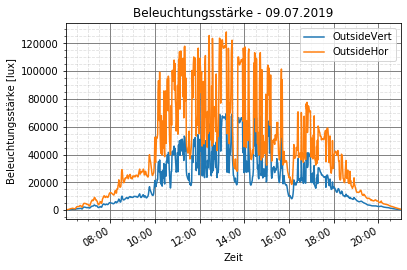

In [6]:
# plot specific timespan on specific day:

ax = df.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00'].plot(
    y=['OutsideVert','OutsideHor'],grid=True,title = 'Beleuchtungsstärke - 09.07.2019' )

ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

# ----------------------------------------------------------------------------------
# Show major grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)

# ----------------------------------------------------------------------------------
# Formatting Date values at x-axis
# https://matplotlib.org/api/dates_api.html

myFmt = myFmt = DateFormatter("%H:%M") # "%m/%d"
ax.xaxis.set_major_formatter(myFmt)

**Define Plot-Function for Day-specific plot**

Arguments: 
- x-axis range with start and end: e.g. start = pd.Timestamp(2019, 5, 5, 4) 
- y-axis maximum value: e.g. 25000 
- various arguments which sensor value to plot: e.g. 'OutsideHor', 'OutsideVat', 'InsideWork'

In [7]:
def day_plt(start, end, max, *args):
    try:
        arg_lst = []
        for i, arg in enumerate(args):
            arg_lst.append(arg)
        ax = df.loc[start:end].plot(y=arg_lst,grid=True,figsize=(15,10),title = 'Beleuchtungsstärke')
    except:
        print("Irgednwas is komisch: ", y)
        
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Beleuchtungsstärke [lux]")
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)
    myFmt = myFmt = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(myFmt)
    ax.set_ylim(-2, max)

# III. Resample:

- Type casting to resample: object to float64

- resample for e.g. cumsum / max / ...

In [8]:
# type casting:

df0 = df.apply(pd.to_numeric, errors='coerce')

#remove epoc column
df0 = df0.drop(columns=['Epoch','new'],axis=1)

# errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# - If ‘raise’, then invalid parsing will raise an exception
# - If ‘coerce’, then invalid parsing will be set as NaN
# - If ‘ignore’, then invalid parsing will return the input

# Alternative (column-wise):
# df_20190709_out['OutsideVert'] = df_20190709_out.OutsideVert.astype(float)


display(df.dtypes.head(3))
display(df0.dtypes)

Epoch           int64
OutsideVert    object
OutsideHor     object
dtype: object

OutsideVert      float64
OutsideHor       float64
InsideCeiling    float64
InsideTable      float64
InsideWork       float64
InsideEye        float64
InsideTable2     float64
InsideWork2      float64
dtype: object

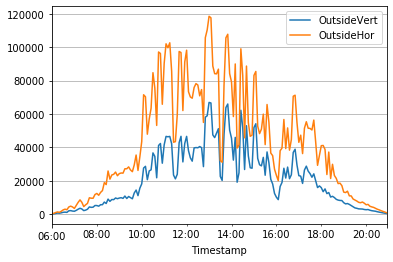

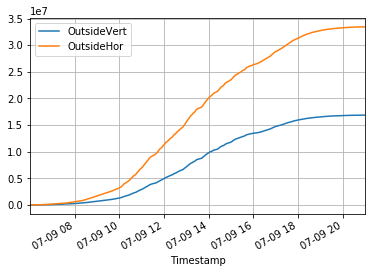

In [9]:
# resample

df_res = df0.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00'][['OutsideVert','OutsideHor']].resample('5min').mean()

df_res.plot(grid = True)

#plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.6)
#myFmt = myFmt = DateFormatter("%H:%M") # "%m/%d"
#ax.xaxis.set_major_formatter(myFmt)

df_res2 = df0.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00'][['OutsideVert','OutsideHor']].cumsum()
df_res2.plot(grid = True)

#### COMPARISON: As panda.core.series.Series - Format

Timestamp
2019-02-11 00:00:47    1
2019-02-11 00:01:57    1
2019-02-11 00:03:07    1
2019-02-11 00:04:17    1
2019-02-11 00:05:27    1
Name: InsideCeiling, dtype: object

Type of df_ceil: 


pandas.core.series.Series

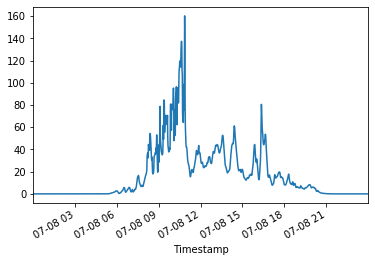

In [10]:
df_ceil = df.InsideCeiling

display(df_ceil.head())
print('Type of df_ceil: ')
display(type(df_ceil))

df_ceil.loc['2019-07-08'].plot()


# IV. Ratio in/out

- klarer Himmel mit Sonne
- bedeckter Himmel = TQ

OutsideVert       6591.697192
OutsideHor       17592.515263
InsideCeiling       26.593382
InsideTable         80.634432
InsideWork          38.363370
InsideEye           64.731380
InsideTable2        80.607924
InsideWork2         38.360012
ratio                0.419207
dtype: float64

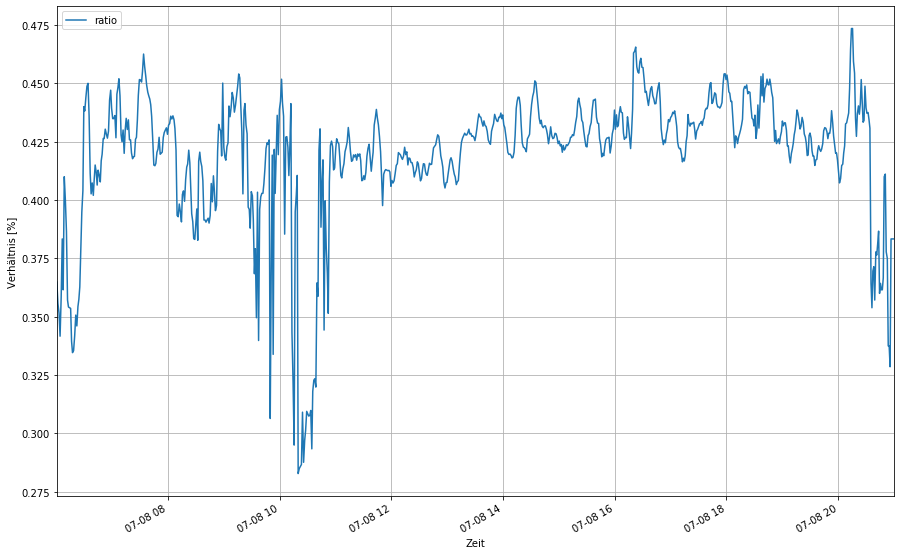

In [11]:
# Add column with ratio

# create copy to avoid error because overwriting slice of df!
df_ratio = df0.loc['2019-07-08 06:00:00' : '2019-07-08 21:00:00'].copy()

# calculate ratio
df_ratio['ratio'] = df_ratio['InsideCeiling']/df_ratio['OutsideVert']*100
df_ratio.head(3)

ax = df_ratio.plot(y='ratio',grid=True,figsize=(15,10))
ax.set_xlabel("Zeit")
ax.set_ylabel("Verhältnis [%]")

display(df_ratio.mean())

## Functions for Ratio-Plot

In [12]:
# Function to add ratio column for given day
def df_rat(date_start, date_end):
    df_ratio_ = df0.loc[date_start : date_end].copy()
    df_ratio_['ratio'] = df_ratio_['InsideCeiling']/df_ratio_['OutsideHor']*100
    tq_print(df_ratio_)
    tq_plot(df_ratio_)
    return df_ratio_

def tq_plot(df):
    ax = df.plot(y='ratio',grid=True,figsize=(15,10),title = 'TQ')
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Verhältnis [%]")

def tq_print(df):
    display(df.head(2))
    print("Mean of ratio:")
    display(df.ratio.mean())
    print("Variance of ratio:")
    display(df.ratio.var())
    print("Maximum: ")
    display(df.max())
    print("Minimum: ")
    display(df.min())

# V. Tagesauswertungen

Typische Situationen:

- Bedeckter Himmel
- Klarer Himmel mit Sonne


### Bedeckter Himmel

11.02.2019


**Plot outside hor / vert:**

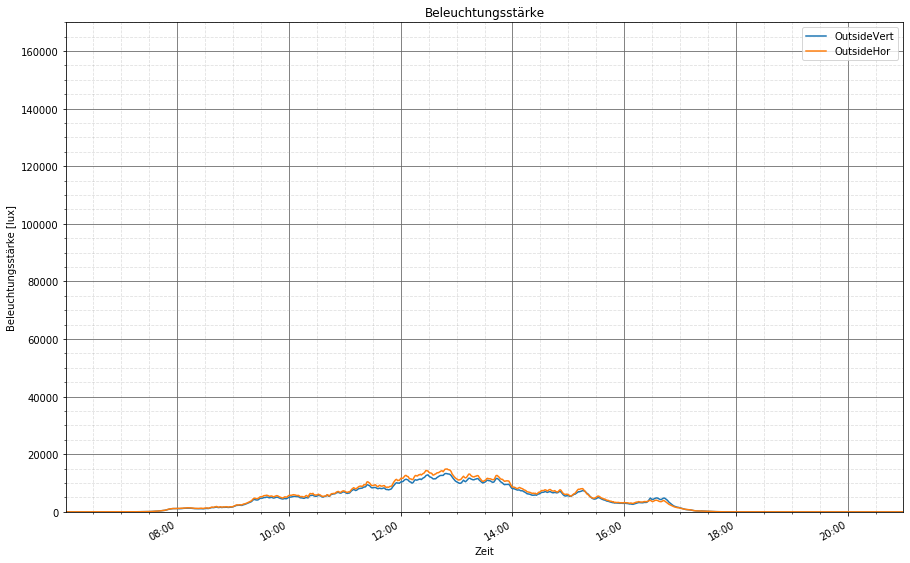

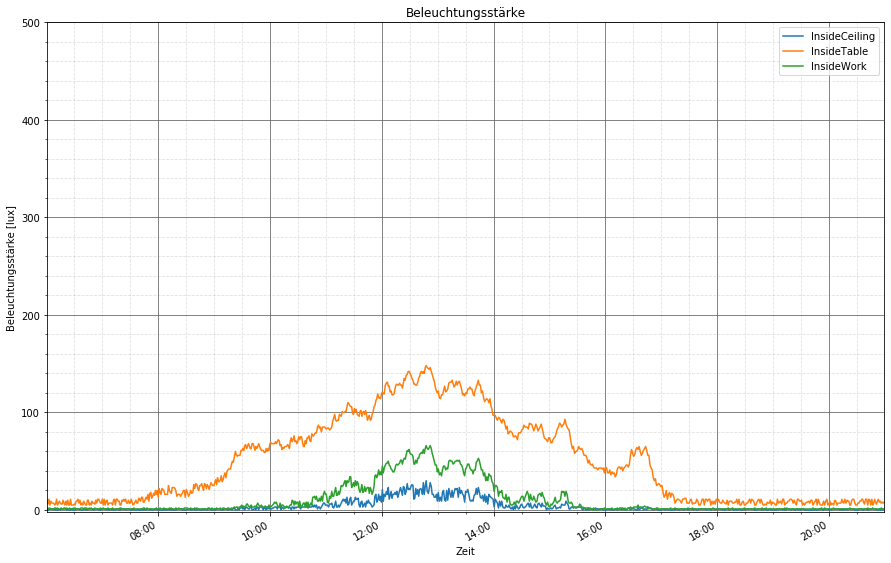

In [13]:
# # plot outside (hor / vert)
day_plt(pd.Timestamp(2019, 2, 11, 6), pd.Timestamp(2019, 2,11, 21), 170000, 'OutsideVert','OutsideHor')
# plot inside (work / table /ceiling)# plot inside (work / table /ceiling)
day_plt(pd.Timestamp(2019, 2, 11, 6), pd.Timestamp(2019, 2,11, 21), 500, 'InsideCeiling','InsideTable', 'InsideWork')

**TQ (Ratio:Inside/Outside)**

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,ratio
Timestamp,,,,,,,,,
2019-02-11 09:00:36,1830.0,1930.0,1.0,28.0,1.0,1.0,NaN,NaN,0.051813
2019-02-11 09:01:36,1970.0,2090.0,0.0,31.0,1.0,0.0,NaN,NaN,0.000000


Mean of ratio:


0.06895132109765159

Variance of ratio:


0.002616545965141719

Maximum: 


OutsideVert      13320.000000
OutsideHor       14910.000000
InsideCeiling       30.000000
InsideTable        148.000000
InsideWork          66.000000
InsideEye           59.000000
InsideTable2              NaN
InsideWork2               NaN
ratio                0.202293
dtype: float64

Minimum: 


OutsideVert      1430.0
OutsideHor       1340.0
InsideCeiling       0.0
InsideTable        24.0
InsideWork          0.0
InsideEye           0.0
InsideTable2        NaN
InsideWork2         NaN
ratio               0.0
dtype: float64

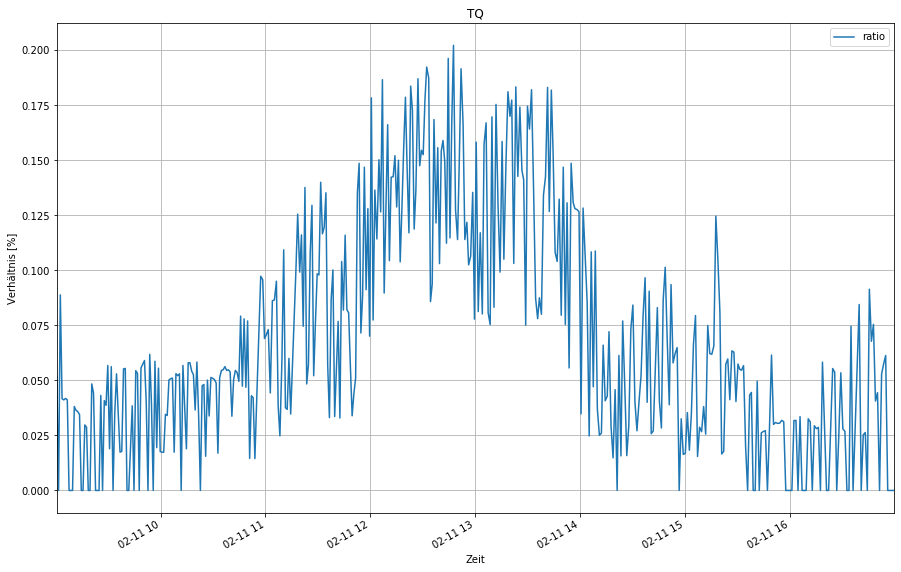

In [25]:
# function gets argument as pandas-timestamp
start = pd.Timestamp(2019,2, 11, 9) 
end = pd.Timestamp(2019, 2, 11, 17)

df_tq = df_rat(start, end)

### Klarer Himmel mit Sonne

15.02.2019

**Plots**

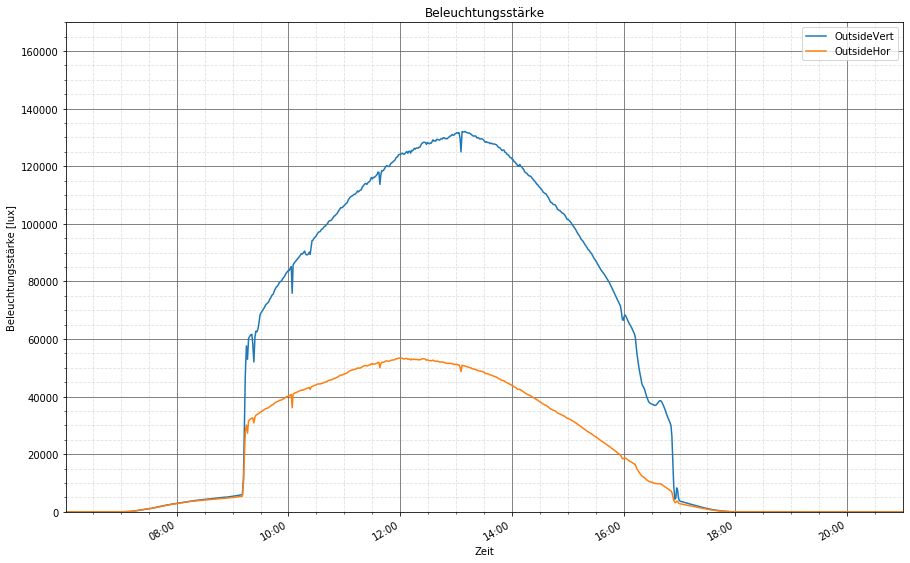

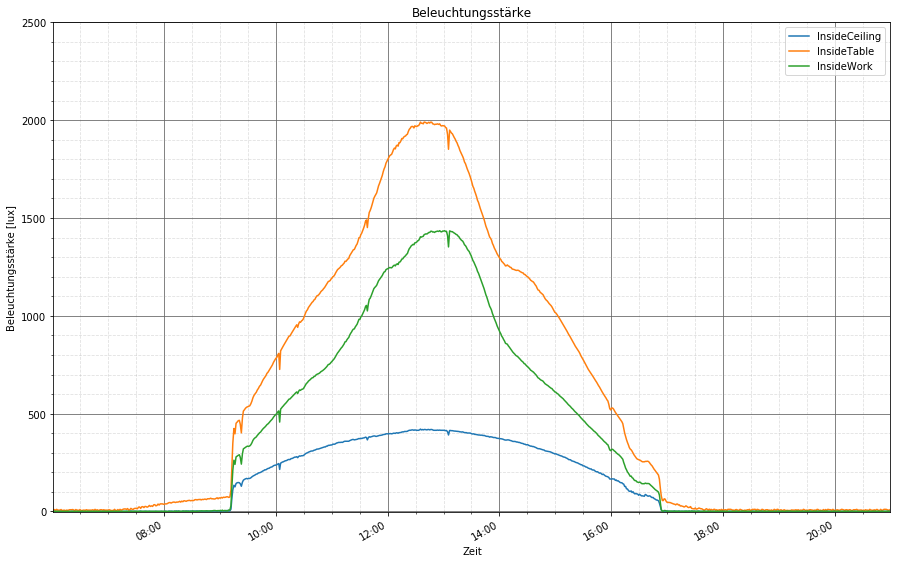

In [15]:
# plot outside (hor / vert)
day_plt(pd.Timestamp(2019, 2, 15, 6), pd.Timestamp(2019, 2,15, 21), 170000, 'OutsideVert','OutsideHor')
# plot inside (work / table /ceiling)
day_plt(pd.Timestamp(2019, 2, 15, 6), pd.Timestamp(2019, 2,15, 21), 2500, 'InsideCeiling','InsideTable', 'InsideWork')

**Ratio: Inside/Outside**

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,ratio
Timestamp,,,,,,,,,
2019-02-15 09:00:09,5420.0,5010.0,1.0,68.0,6.0,10.0,NaN,NaN,0.01996
2019-02-15 09:01:19,5480.0,5050.0,0.0,72.0,3.0,6.0,NaN,NaN,0.00000


Mean of ratio:


0.7476012213657196

Variance of ratio:


0.032308239762645

Maximum: 


OutsideVert      132100.000000
OutsideHor        53410.000000
InsideCeiling       421.000000
InsideTable        1990.000000
InsideWork         1435.000000
InsideEye           677.000000
InsideTable2               NaN
InsideWork2                NaN
ratio                 0.910992
dtype: float64

Minimum: 


OutsideVert      3860.0
OutsideHor       2850.0
InsideCeiling       0.0
InsideTable        47.0
InsideWork          1.0
InsideEye           4.0
InsideTable2        NaN
InsideWork2         NaN
ratio               0.0
dtype: float64

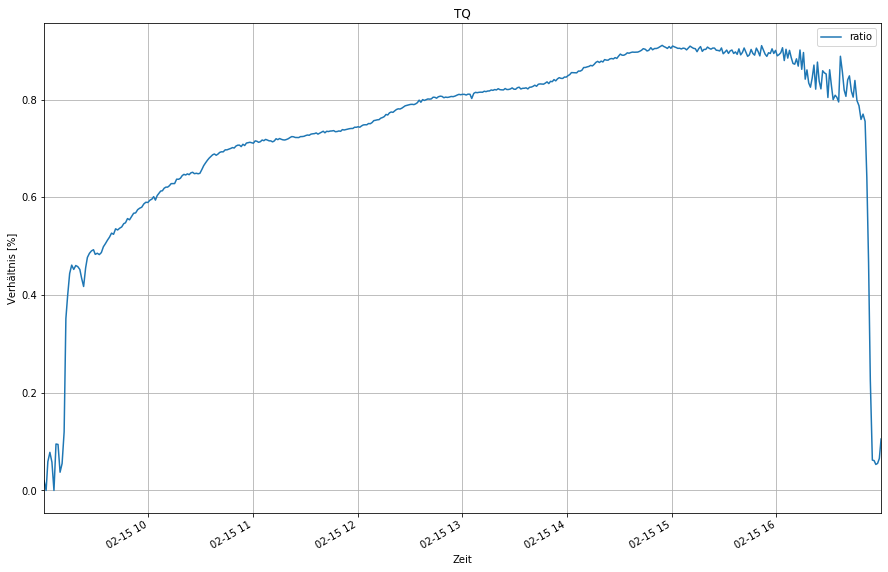

In [24]:
date_start = pd.Timestamp(2019, 2, 15, 9) 
date_end = pd.Timestamp(2019, 2, 15, 17)

df_tq2 = df_rat(date_start, date_end)


## Find cloudy days

In [26]:
df0.head()
dg = df0.groupby(df0.index.date).max() # new np array containing MAX values of the DAY (grouped by date)

#series = dg.OutsideHor < 40000

dg.loc[dg['OutsideHor'] < 70000]

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2
2019-02-11,13320.0,14910.0,30.0,148.0,66.0,59.0,NaN,NaN
2019-02-15,132100.0,53410.0,421.0,1990.0,1435.0,677.0,NaN,NaN
2019-04-28,27480.0,54240.0,91.0,307.0,197.0,141.0,NaN,NaN
2019-05-05,30680.0,30950.0,96.0,332.0,187.0,149.0,NaN,NaN
2019-05-12,18570.0,44980.0,59.0,189.0,111.0,93.0,NaN,NaN
2019-05-15,21120.0,45890.0,66.0,214.0,128.0,104.0,NaN,NaN
2019-05-20,13780.0,34050.0,47.0,147.0,83.0,73.0,NaN,NaN
2019-05-21,25740.0,52880.0,80.0,231.0,150.0,125.0,NaN,NaN
2019-05-27,18930.0,43790.0,72.0,187.0,129.0,85.0,NaN,NaN
2019-05-28,20570.0,43740.0,69.0,206.0,142.0,91.0,NaN,NaN


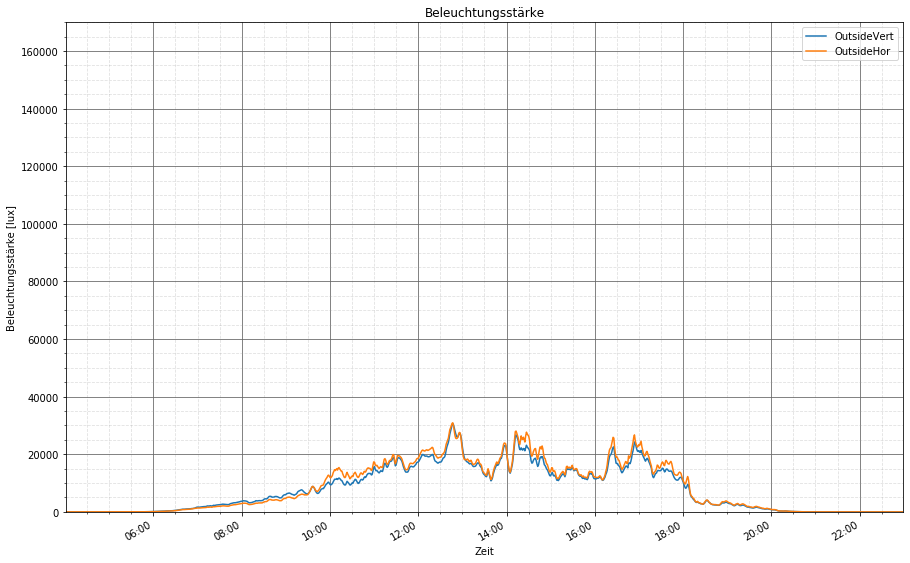

In [18]:
date_start = pd.Timestamp(2019, 5, 5, 4) 
date_end = pd.Timestamp(2019, 5, 5, 23)

day_plt(date_start, date_end, 170000, 'OutsideVert','OutsideHor')

# cDA - calculation